In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('pmbench.csv', delimiter = ",")

In [82]:
data.head()

,pool,threads,size,working_set,rw_ratio,latency,latency_diviation,offset,pattern,mode
0,fsdax,1,256,128,0,181,0.0,uniform,random,App
1,ram_l,1,256,128,0,32,0.0,uniform,random,App
2,pm_l,1,256,128,0,38,0.0,uniform,random,App
3,ram_r,1,256,128,0,179,0.0,uniform,random,App
4,pm_r,1,256,128,0,274,0.0,uniform,random,App


In [258]:
def cols(df):
    return df[["latency"]]
#    return df[["latency","latency_diviation"]]

In [346]:
apps = data[
    (data["offset"] == "uniform") &
    (data['pattern'] == "random") &
    (data['mode'] == "App") &
    True].drop(columns=["offset","pattern","mode","size","working_set"]).set_index('threads')

def pool(name, df):
     return df[df['pool'] == name].drop(columns=["pool"])
    
def rw_ratio(ratio, df):
     return df[df['rw_ratio'] == ratio].drop(columns=["rw_ratio"])
        
apps_fsdax = pool('fsdax', apps)
apps_ram_l = pool('ram_l', apps)
apps_ram_r = pool('ram_r', apps)
apps_pm_r  = pool('pm_r',  apps)
apps_pm_l  = pool('pm_l',  apps)

In [352]:
apps_ram_r

,rw_ratio,latency,latency_diviation
threads,,,
1,0,179,0.00
1,33,215,0.00
1,50,244,0.00
1,66,274,0.00
1,100,39,0.00
2,0,277,0.00
2,33,275,0.10
2,50,288,0.05
2,66,306,0.05


In [251]:
sub = data[]
    (data["offset"] == "uniform") &
    (data['pattern'] == "random") &
    (data['mode'] == "App") &
#    (data['mode'] == "Mem100") &
#    (data['pool'] != "fsdax") &
    (data['pool'] == "pm_r") &
    True].set_index("threads")

In [275]:
sub = data[
    (data["offset"] == "uniform") &
    (data['pattern'] == "random") &
    (data['mode'] == "App") &
#    (data['mode'] == "Mem100") &
#    (data['pool'] != "fsdax") &
    (data['pool'] == "pm_r") &
    True].set_index("threads")

In [273]:
ro = sub[sub["rw_ratio"] == 0]
rrw = sub[sub["rw_ratio"] == 33]
wo = sub[sub["rw_ratio"] == 100]
rww = sub[sub["rw_ratio"] == 66]
rw = sub[sub["rw_ratio"] == 50]

#join(join(ro, rrw, "_rrw"), wo, "_wo")
app = cols(ro).\
    join(cols(rrw), rsuffix="_rrw").\
    join(cols(wo), rsuffix="_wo").\
    join(cols(rww), rsuffix="_rww").\
    join(cols(rw), rsuffix="_rw")
app

,latency,latency_rrw,latency_wo,latency_rww,latency_rw
threads,,,,,
1,274,302,39,365,333
2,519,429,41,447,438
4,1126,795,41,628,691
8,2390,1794,46,1176,1489
16,4819,3814,51,2658,3280
32,9912,7915,63,5746,6999


<AxesSubplot:xlabel='threads'>

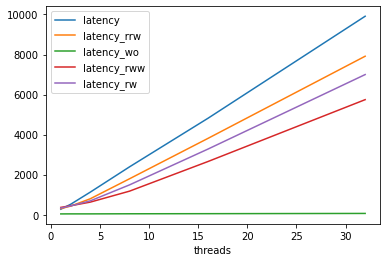

In [274]:
app.plot()

In [142]:
sub

,pool,threads,size,working_set,rw_ratio,latency,latency_diviation,offset,pattern,mode
